<a href="https://colab.research.google.com/github/icpauline/Malaria-Detection-with-Deep-Learning/blob/main/Deep_Learning_Custom_Images_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ORIGINAL DATA SOURCE: This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/


The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.





ORIGINAL DATA SOURCE: This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/


The dataset contains 2 folders - Infected - Uninfected
and a total of 27,558 images.

**Task : To identify whether the person is affected by Malaria or not from the input image.**




In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [ ]:
my_data_dir = '/content/drive/MyDrive/Deep Learning/cell_images/cell_images'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [ ]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path+'/parasitized')[0]

'C99P60ThinF_IMG_20150918_140900_cell_144.png'

In [ ]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [ ]:
para_img= imread(para_cell)

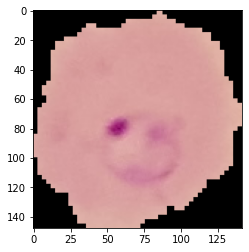

In [ ]:
plt.imshow(para_img)

In [ ]:
para_img.shape

(148, 142, 3)

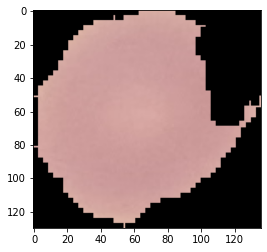

In [ ]:
unifected_cell_path = train_path+'/uninfected/'+os.listdir(train_path+'/uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Let's check how many images there are.**

In [ ]:
len(os.listdir(train_path+'/parasitized'))

12490

In [ ]:
len(os.listdir(train_path+'/uninfected'))

12480

**Let's find out the average dimensions of these images.**

In [ ]:
unifected_cell.shape

(130, 136, 3)

In [ ]:
para_img.shape

(148, 142, 3)

In [ ]:

dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


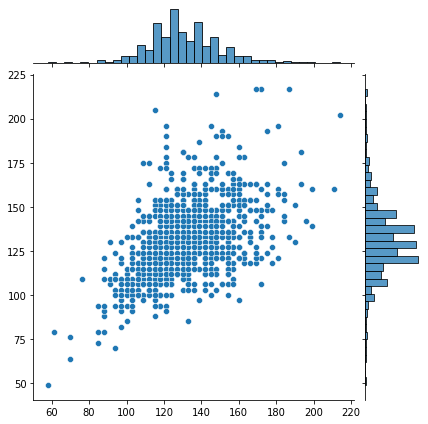

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

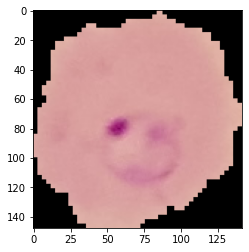

In [ ]:
plt.imshow(para_img)

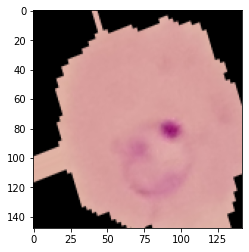

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

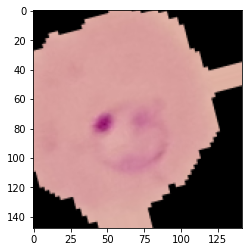

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [ ]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24968 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1561/1561 [==============================] - 3768s 2s/step - loss: 0.3986 - accuracy: 0.8190 - val_loss: 0.1922 - val_accuracy: 0.9300
Epoch 2/20
1561/1561 [==============================] - 818s 524ms/step - loss: 0.1909 - accuracy: 0.9399 - val_loss: 0.1720 - val_accuracy: 0.9423
Epoch 3/20
1561/1561 [==============================] - 803s 515ms/step - loss: 0.1729 - accuracy: 0.9473 - val_loss: 0.1645 - val_accuracy: 0.9431
Epoch 4/20
1561/1561 [==============================] - 806s 516ms/step - loss: 0.1661 - accuracy: 0.9478 - val_loss: 0.1673 - val_accuracy: 0.9438
Epoch 5/20
1561/1561 [==============================] - 810s 519ms/step - loss: 0.1585 - accuracy: 0.9494 - val_loss: 0.1578 - val_accuracy: 0.9419
Epoch 6/20
1561/1561 [==============================] - 809s 518ms/step - loss: 0.1567 - accuracy: 0.9507 - val_loss: 0.1492 - val_accuracy: 0.9477
Epoch 7/20
1561/1561 [==============================] - 810s 519ms/step - loss: 0.1559 - accuracy: 0.9507 - val_lo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Deep Learning/malaria_detector.h5')
# model.save('./drive/My Drive/malaria_detector.h5')

# Evaluating the Model

In [ ]:
losses = pd.DataFrame(model.history.history)

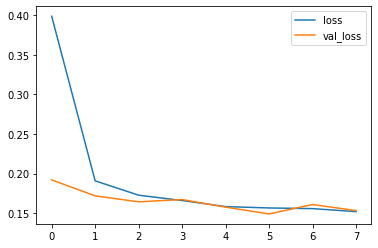

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate_generator(test_image_gen)

[0.1546924114227295, 0.9480769038200378]

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [ ]:
pred_probabilities

array([[7.6438196e-04],
       [9.7439530e-05],
       [2.1046303e-04],
       ...,
       [9.9374229e-01],
       [9.9063301e-01],
       [9.7339839e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1188,  112],
       [  33, 1267]])

# Predicting on an Image

In [ ]:

para_cell

'/content/drive/MyDrive/Deep Learning/cell_images/cell_images/train//parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)

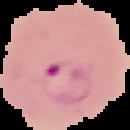

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image.shape

(130, 130, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 130, 130, 3)

In [ ]:
model.predict(my_image)

1/1 [==============================] - 0s 103ms/step


array([[0.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

**Deployment using Streamlit**

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 6.8 MB/s 
     |████████████████████████████████| 237 kB 64.2 MB/s 
     |████████████████████████████████| 4.7 MB 43.4 MB/s 
     |████████████████████████████████| 164 kB 64.1 MB/s 
     |████████████████████████████████| 182 kB 58.4 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=a359c03f29e63e580ba0e1c8d2684a718edfd19c9e4ff0671bb37305df7b1fbe
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
import streamlit as st
from PIL import Image, ImageOps

In [ ]:
# Creating webpage header:

In [ ]:
ngrok.set_auth_token('2H2uYAFDnrv3aleS5as0bIpmwrU_59PZCqw3SsKoZviNxn9mu')

INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.7/dist-packages/pyngrok/bin/ngrok
2022-11-04 12:46:54.460 INFO    pyngrok.process: Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.7/dist-packages/pyngrok/bin/ngrok


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 6.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=5e49fd5acc1c127a7cc9009ef384b8c5ae6e32ce5525776ed8eaf92d1b3114e4
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok

In [ ]:
!nohup streamlit run streamlit_app.py --server.port 80 &
public_url = ngrok.connect(port='80')
public_url

nohup: appending output to 'nohup.out'


INFO:pyngrok.ngrok:Opening tunnel named: http-80-70aa1372-0a20-4d89-a966-1cba148fa768
2022-11-04 13:20:59.020 INFO    pyngrok.ngrok: Opening tunnel named: http-80-70aa1372-0a20-4d89-a966-1cba148fa768
INFO:pyngrok.process.ngrok:t=2022-11-04T13:20:59+0000 lvl=info msg="no configuration paths supplied"
2022-11-04 13:20:59.112 INFO    pyngrok.process.ngrok: t=2022-11-04T13:20:59+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-11-04T13:20:59+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-11-04 13:20:59.120 INFO    pyngrok.process.ngrok: t=2022-11-04T13:20:59+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-11-04T13:20:59+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-11-04 13:20:59.125 INFO    pyngrok.process.ngrok: t=2022-11-04T13:20:59+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngro

<NgrokTunnel: "http://f41d-34-125-96-0.ngrok.io" -> "http://localhost:80">

2022-11-04 13:20:59.610 INFO    pyngrok.process.ngrok: t=2022-11-04T13:20:59+0000 lvl=info msg=end pg=/api/tunnels id=65e6ddbab6e01959 status=201 dur=171.803149ms
INFO:pyngrok.process.ngrok:t=2022-11-04T13:20:59+0000 lvl=info msg=start pg="/api/tunnels/http-80-70aa1372-0a20-4d89-a966-1cba148fa768 (http)" id=50fda721ab6e57c2
2022-11-04 13:20:59.620 INFO    pyngrok.process.ngrok: t=2022-11-04T13:20:59+0000 lvl=info msg=start pg="/api/tunnels/http-80-70aa1372-0a20-4d89-a966-1cba148fa768 (http)" id=50fda721ab6e57c2
INFO:pyngrok.process.ngrok:t=2022-11-04T13:20:59+0000 lvl=info msg=end pg="/api/tunnels/http-80-70aa1372-0a20-4d89-a966-1cba148fa768 (http)" id=50fda721ab6e57c2 status=200 dur=206.231µs
2022-11-04 13:20:59.632 INFO    pyngrok.process.ngrok: t=2022-11-04T13:20:59+0000 lvl=info msg=end pg="/api/tunnels/http-80-70aa1372-0a20-4d89-a966-1cba148fa768 (http)" id=50fda721ab6e57c2 status=200 dur=206.231µs


In [ ]:
from pyngrok import ngrok
tunnels = ngrok.get_tunnels()
tunnels

INFO:pyngrok.process.ngrok:t=2022-11-04T13:19:57+0000 lvl=info msg=start pg=/api/tunnels id=5b231e103995a6de
2022-11-04 13:19:57.895 INFO    pyngrok.process.ngrok: t=2022-11-04T13:19:57+0000 lvl=info msg=start pg=/api/tunnels id=5b231e103995a6de
INFO:pyngrok.process.ngrok:t=2022-11-04T13:19:57+0000 lvl=info msg=end pg=/api/tunnels id=5b231e103995a6de status=200 dur=176.045µs


[]

2022-11-04 13:19:57.900 INFO    pyngrok.process.ngrok: t=2022-11-04T13:19:57+0000 lvl=info msg=end pg=/api/tunnels id=5b231e103995a6de status=200 dur=176.045µs


In [ ]:
ngrok.kill()

INFO:pyngrok.process:Killing ngrok process: 10887
2022-11-04 13:20:09.048 INFO    pyngrok.process: Killing ngrok process: 10887


In [ ]:
%%writefile streamlit_app.py 
"""
@author: Pauline IC
"""
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
st.write("""
          # Malaria Cell Classification
          """
          )
upload_file = st.sidebar.file_uploader("Upload Cell Images", type="png")
Generate_pred=st.sidebar.button("Predict")
model=tf.keras.models.load_model('/content/drive/MyDrive/Deep Learning/malaria_detector.h5')
def import_n_pred(image_data, model):
    size = (150,150)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    reshape=img[np.newaxis,...]
    pred = model.predict(reshape)
    return pred
if Generate_pred:
    image=Image.open(upload_file)
    with st.beta_expander('Cell Image', expanded = True):
        st.image(image, use_column_width=True)
    pred=import_n_pred(image, model)
    labels = ['Parasitized', 'Uninfected']
    st.title("Prediction of image is {}".format(labels[np.argmax(pred)]))

Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 80

[#######...........] / extract:localtunnel: verb lock using /root/.npm/_locks/s

npx: installed 22 in 3.186s
your url is: https://gold-lions-obey-34-125-96-0.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.96.0:8501



In [ ]:
!pgrep streamlit